In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Test_Project_MIS.csv")

In [4]:
df

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,Medium
1,2,C,3,T-mis-1755,3,4,84.0,High
2,3,W,3,T-mis-3227,3,1.5,31.5,Medium
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,Medium
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,Medium
...,...,...,...,...,...,...,...,...
1309,1310,S,2,"T-mis-261,T-mis- 934",1,3,21.0,Low
1310,1311,S,2,"T-mis-299,T-mis- 290,T-mis- 2090",3,4,84.0,Low
1311,1312,C,3,"T-mis-1289,T-mis- 652,T-mis- 1061",3,4,84.0,Low
1312,1313,M,1,"T-mis-1003,T-mis- 1407,T-mis- 922",1,5,35.0,Low


In [5]:
df["B_Req"].value_counts()

1       1
883     1
881     1
880     1
879     1
       ..
438     1
437     1
436     1
435     1
1314    1
Name: B_Req, Length: 1314, dtype: int64

In [6]:
df.columns

Index(['B_Req', 'R_Priority', 'Weights', 'FP', 'Complexity', 'Time', 'Cost',
       'Priority'],
      dtype='object')

In [7]:
df["R_Priority"].value_counts()

M    444
S    433
W    228
C    209
Name: R_Priority, dtype: int64

### Feature Extraction

In [8]:
df["FP"][0].split(",")

['T-mis-2708',
 'T-mis- 2151',
 'T-mis- 560',
 'T-mis- 164',
 'T-mis-3122',
 'T-mis- 1279',
 'T-mis- 772']

In [9]:
df["No of FPS"] = df["FP"].apply(lambda x : len(x.split(","))) 

In [10]:
df["No of FPS"]

0       7
1       1
2       1
3       3
4       3
       ..
1309    2
1310    3
1311    3
1312    3
1313    4
Name: No of FPS, Length: 1314, dtype: int64

In [11]:
df

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority,No of FPS
0,1,C,3,"T-mis-2708,T-mis- 2151,T-mis- 560,T-mis- 164,T...",3,8,168.0,Medium,7
1,2,C,3,T-mis-1755,3,4,84.0,High,1
2,3,W,3,T-mis-3227,3,1.5,31.5,Medium,1
3,4,S,2,"T-mis-2440,T-mis- 2659,T-mis- 1510",1,4,28.0,Medium,3
4,5,C,3,"T-mis-2912,T-mis- 2042,T-mis- 1020",5,4,140.0,Medium,3
...,...,...,...,...,...,...,...,...,...
1309,1310,S,2,"T-mis-261,T-mis- 934",1,3,21.0,Low,2
1310,1311,S,2,"T-mis-299,T-mis- 290,T-mis- 2090",3,4,84.0,Low,3
1311,1312,C,3,"T-mis-1289,T-mis- 652,T-mis- 1061",3,4,84.0,Low,3
1312,1313,M,1,"T-mis-1003,T-mis- 1407,T-mis- 922",1,5,35.0,Low,3


In [12]:
df.to_csv("processed_data.csv",index=None)

### Data Imbalance

In [13]:
df["Priority"].value_counts()

Medium    655
Low       524
High      135
Name: Priority, dtype: int64

### Checking Null Values

In [14]:
df.isnull().sum()

B_Req         0
R_Priority    0
Weights       0
FP            0
Complexity    0
Time          0
Cost          0
Priority      0
No of FPS     0
dtype: int64

### Data Preprocessing

In [15]:
df[df["Time"]=="1..5"]

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority,No of FPS
685,686,C,3,T-mis-3130,5,1..5,35.0,Low,1


In [16]:
def trans(x):
    if len(x.split("."))>2:
        return float(x.split(".")[0] +"."+x.split(".")[2])
    else:
        return float(x)
df["Time"] = df["Time"].apply(trans)

In [17]:
df[df["Time"]=="1..5"]

,B_Req,R_Priority,Weights,FP,Complexity,Time,Cost,Priority,No of FPS


In [18]:
col = ['R_Priority', 'Weights', 'Complexity', 'Time', 'Cost',
       "No of FPS",'Priority']

In [19]:
df = df[col]

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analaysis

In [21]:
df[df["Cost"]<0]

,R_Priority,Weights,Complexity,Time,Cost,No of FPS,Priority


C:\Users\ajayv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


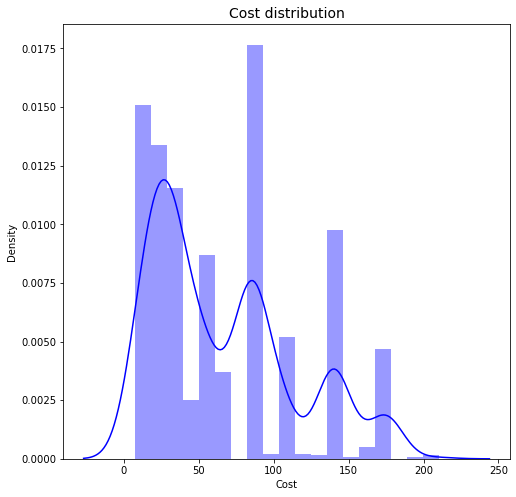

In [22]:
plt.figure(figsize = (8, 8))
sns.distplot(df['Cost'], color='blue')
plt.title('Cost distribution', fontsize = 14)
plt.show()

C:\Users\ajayv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


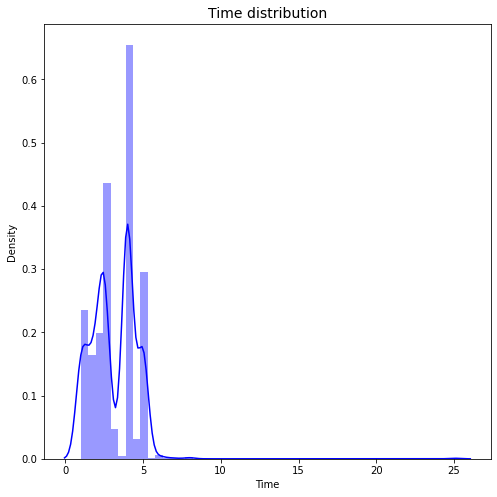

In [23]:
plt.figure(figsize = (8, 8))
sns.distplot(df['Time'], color='blue')
plt.title('Time distribution', fontsize = 14)
plt.show()

<AxesSubplot:xlabel='R_Priority'>

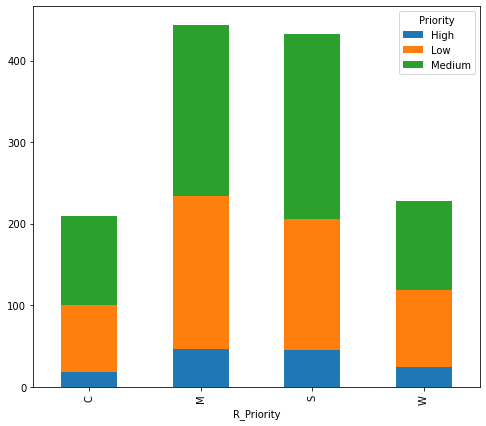

In [24]:
df.groupby('R_Priority')['Priority'].value_counts().unstack('Priority').plot(kind='bar', stacked=True, figsize=(8, 7))

<AxesSubplot:xlabel='Complexity'>

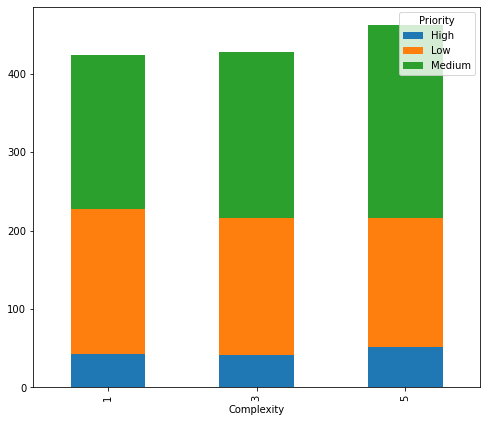

In [25]:
df.groupby('Complexity')['Priority'].value_counts().unstack('Priority').plot(kind='bar', stacked=True, figsize=(8, 7))

<AxesSubplot:xlabel='Weights'>

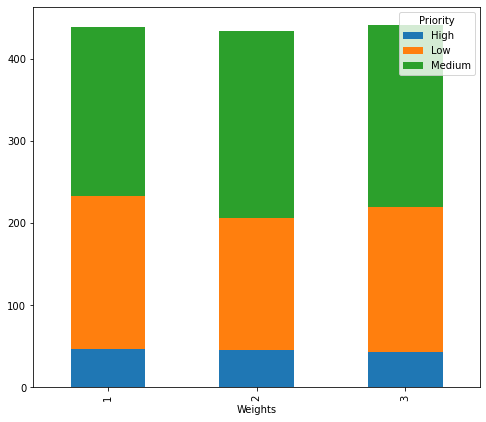

In [26]:
df.groupby('Weights')['Priority'].value_counts().unstack('Priority').plot(kind='bar', stacked=True, figsize=(8, 7))

### label Encoding

In [27]:
df

,R_Priority,Weights,Complexity,Time,Cost,No of FPS,Priority
0,C,3,3,8.0,168.0,7,Medium
1,C,3,3,4.0,84.0,1,High
2,W,3,3,1.5,31.5,1,Medium
3,S,2,1,4.0,28.0,3,Medium
4,C,3,5,4.0,140.0,3,Medium
...,...,...,...,...,...,...,...
1309,S,2,1,3.0,21.0,2,Low
1310,S,2,3,4.0,84.0,3,Low
1311,C,3,3,4.0,84.0,3,Low
1312,M,1,1,5.0,35.0,3,Low


In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["R_Priority"] = le.fit_transform(df["R_Priority"])



<ipython-input-28-fb0c514f2561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["R_Priority"] = le.fit_transform(df["R_Priority"])


In [29]:
df

,R_Priority,Weights,Complexity,Time,Cost,No of FPS,Priority
0,0,3,3,8.0,168.0,7,Medium
1,0,3,3,4.0,84.0,1,High
2,3,3,3,1.5,31.5,1,Medium
3,2,2,1,4.0,28.0,3,Medium
4,0,3,5,4.0,140.0,3,Medium
...,...,...,...,...,...,...,...
1309,2,2,1,3.0,21.0,2,Low
1310,2,2,3,4.0,84.0,3,Low
1311,0,3,3,4.0,84.0,3,Low
1312,1,1,1,5.0,35.0,3,Low


In [30]:
def trans_o(x):
    if x == "Low":
        return 0
    if x == "Medium":
        return 1
    if x== "High":
        return 2
df["Priority"] = df["Priority"].apply(trans_o)

<ipython-input-30-47a85a674936>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Priority"] = df["Priority"].apply(trans_o)


In [31]:
df

,R_Priority,Weights,Complexity,Time,Cost,No of FPS,Priority
0,0,3,3,8.0,168.0,7,1
1,0,3,3,4.0,84.0,1,2
2,3,3,3,1.5,31.5,1,1
3,2,2,1,4.0,28.0,3,1
4,0,3,5,4.0,140.0,3,1
...,...,...,...,...,...,...,...
1309,2,2,1,3.0,21.0,2,0
1310,2,2,3,4.0,84.0,3,0
1311,0,3,3,4.0,84.0,3,0
1312,1,1,1,5.0,35.0,3,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   R_Priority  1314 non-null   int32  
 1   Weights     1314 non-null   int64  
 2   Complexity  1314 non-null   int64  
 3   Time        1314 non-null   float64
 4   Cost        1314 non-null   float64
 5   No of FPS   1314 non-null   int64  
 6   Priority    1314 non-null   int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 66.9 KB


### Heat Map

In [33]:
df.corr()

,R_Priority,Weights,Complexity,Time,Cost,No of FPS,Priority
R_Priority,1.000000,0.237201,-0.020036,0.039060,-0.004368,0.016952,0.013987
Weights,0.237201,1.000000,0.009000,-0.016053,-0.010310,-0.024085,0.008083
Complexity,-0.020036,0.009000,1.000000,-0.030772,0.727958,-0.008664,0.055137
Time,0.039060,-0.016053,-0.030772,1.000000,0.562109,0.633466,0.038987
Cost,-0.004368,-0.010310,0.727958,0.562109,1.000000,0.407281,0.076122
No of FPS,0.016952,-0.024085,-0.008664,0.633466,0.407281,1.000000,0.007271
Priority,0.013987,0.008083,0.055137,0.038987,0.076122,0.007271,1.000000


<AxesSubplot:>

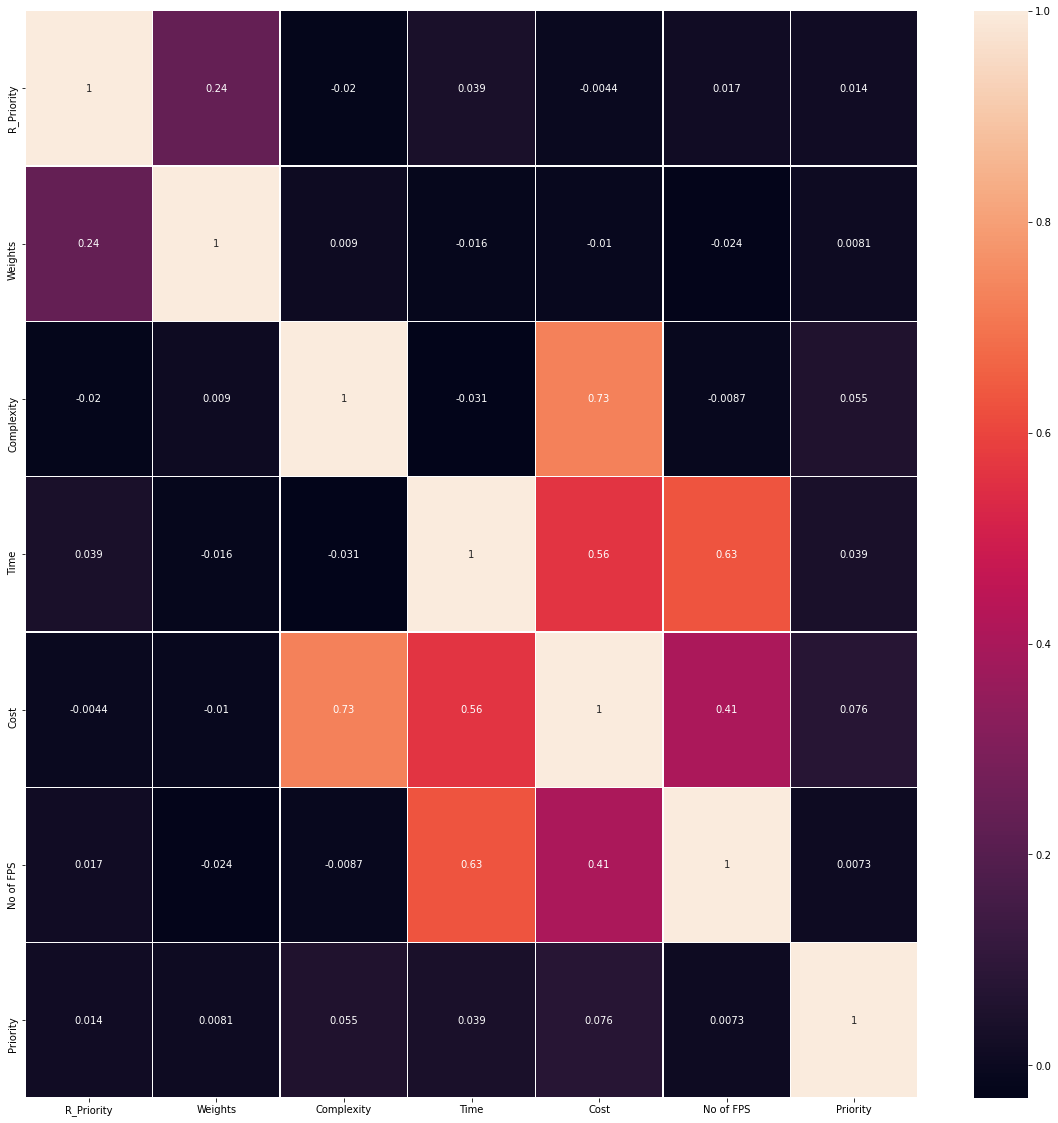

In [34]:

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)

In [35]:
df

,R_Priority,Weights,Complexity,Time,Cost,No of FPS,Priority
0,0,3,3,8.0,168.0,7,1
1,0,3,3,4.0,84.0,1,2
2,3,3,3,1.5,31.5,1,1
3,2,2,1,4.0,28.0,3,1
4,0,3,5,4.0,140.0,3,1
...,...,...,...,...,...,...,...
1309,2,2,1,3.0,21.0,2,0
1310,2,2,3,4.0,84.0,3,0
1311,0,3,3,4.0,84.0,3,0
1312,1,1,1,5.0,35.0,3,0


In [36]:
cols = ['R_Priority', 'Weights', 'Complexity', 'Time', 'Cost',"No of FPS"]

In [37]:
df[cols]

,R_Priority,Weights,Complexity,Time,Cost,No of FPS
0,0,3,3,8.0,168.0,7
1,0,3,3,4.0,84.0,1
2,3,3,3,1.5,31.5,1
3,2,2,1,4.0,28.0,3
4,0,3,5,4.0,140.0,3
...,...,...,...,...,...,...
1309,2,2,1,3.0,21.0,2
1310,2,2,3,4.0,84.0,3
1311,0,3,3,4.0,84.0,3
1312,1,1,1,5.0,35.0,3


### OverSampling

In [38]:
df["Priority"].value_counts()

1    655
0    524
2    135
Name: Priority, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(
    df, test_size=0.33, random_state=42)

In [40]:
X_train = pd.concat([X_train,X_train[X_train["Priority"]==2],X_train[X_train["Priority"]==2],X_train[X_train["Priority"]==2]])
X_train["Priority"].value_counts()

1    434
2    396
0    347
Name: Priority, dtype: int64

In [41]:
y_train = X_train["Priority"]
X_train = X_train.drop(["Priority"],axis=1)


In [42]:
y_test = X_test["Priority"]
X_test = X_test.drop(["Priority"],axis=1)

In [43]:
from sklearn.metrics import classification_report

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
y_pred = clf.predict(X_train)
print(classification_report(y_train.values, y_pred ,digits=4))

              precision    recall  f1-score   support

           0     0.5732    0.5187    0.5446       347
           1     0.6203    0.5645    0.5911       434
           2     0.6496    0.7677    0.7037       396

    accuracy                         0.6194      1177
   macro avg     0.6144    0.6170    0.6131      1177
weighted avg     0.6163    0.6194    0.6153      1177



In [46]:
y_pred = clf.predict(X_test)
print(classification_report(y_test.values, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.4184    0.3333    0.3711       177
           1     0.4943    0.3891    0.4354       221
           2     0.0756    0.2500    0.1161        36

    accuracy                         0.3548       434
   macro avg     0.3294    0.3242    0.3075       434
weighted avg     0.4286    0.3548    0.3827       434



### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [48]:
y_pred = clf.predict(X_train)
print(classification_report(y_train.values, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5880    0.4813    0.5293       347
           1     0.6158    0.5760    0.5952       434
           2     0.6407    0.7879    0.7067       396

    accuracy                         0.6194      1177
   macro avg     0.6148    0.6151    0.6104      1177
weighted avg     0.6160    0.6194    0.6133      1177



In [49]:
y_pred = clf.predict(X_test)
print(classification_report(y_test.values, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.4167    0.3107    0.3560       177
           1     0.5028    0.4072    0.4500       221
           2     0.0732    0.2500    0.1132        36

    accuracy                         0.3548       434
   macro avg     0.3309    0.3227    0.3064       434
weighted avg     0.4320    0.3548    0.3837       434



### Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [51]:
y_pred = clf.predict(X_train)
print(classification_report(y_train.values, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       347
           1     0.3877    0.6083    0.4735       434
           2     0.3871    0.4848    0.4305       396

    accuracy                         0.3874      1177
   macro avg     0.2583    0.3644    0.3013      1177
weighted avg     0.2732    0.3874    0.3195      1177



C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
y_pred = clf.predict(X_test)
print(classification_report(y_test.values, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       177
           1     0.4981    0.6063    0.5469       221
           2     0.0970    0.4444    0.1592        36

    accuracy                         0.3456       434
   macro avg     0.1984    0.3503    0.2354       434
weighted avg     0.2617    0.3456    0.2917       434



C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
